<a href="https://colab.research.google.com/github/ardilalukita14/PCVK-FinalProject-CarPark/blob/main/Final_Project_CarDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT UAS - DETECTION OBJECT "CAR"**

### **Tujuan Project :**
- Mampu mengimplementasikan haar cascade sebagi metode yang akan 
  membantu mendeteksi keberadaan objek car dalam sebuah citra.
- Mampu mengimplementasikan metode edge detection ke dalam dataset car park,
  untuk membantu mengelompokkan objek-objek dalam citra sekaligus
  menganalisa citra lebih lanjut.
- Membandingkan hasil deteksi tepi dari ketiga metode edge detection yang ada (sobel, 
  laplacian, dan canny).
- Mengetahui keakuratan haar cascade dalam mendeteksi objek sebuah citra.
- Membuktikan bahwa keberadaan noise dalam sebuah citra akan mempengaruhi hasil analisa
  metode edge detection.
- Mengetahui keakuratan sobel, laplacian, dan canny dalam mendeteksi tepi citra.

### **Anggota Kelompok** 

1. Ardila Lukita Sari
2. Eksa Lailia M
3. Fathin Naufaliya

Mengolah citra dengan menggunakan metode "edge detection". Adapun metode edge detection yang digunakan ialah 

- Sobel
- Laplacian
- Canny

Dengan ketiga metode edge detection ini, kami ingin mengetahui seperti apa perbedaan hasil pengolahan citra dengan cara sobel, laplacian, dan canny. Selain itu, kami juga ingin mengetahui seberapa besar pengaruh noise terhadap hasil analisa dari 3 jenis metode edge detection dalam sebuah citra. 

## **Import Library**

In [2]:
# import library yang akan dibutuhkan dalam praktikum

import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
import math

## **Akses Google Drive**

In [3]:
# akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Sobel**

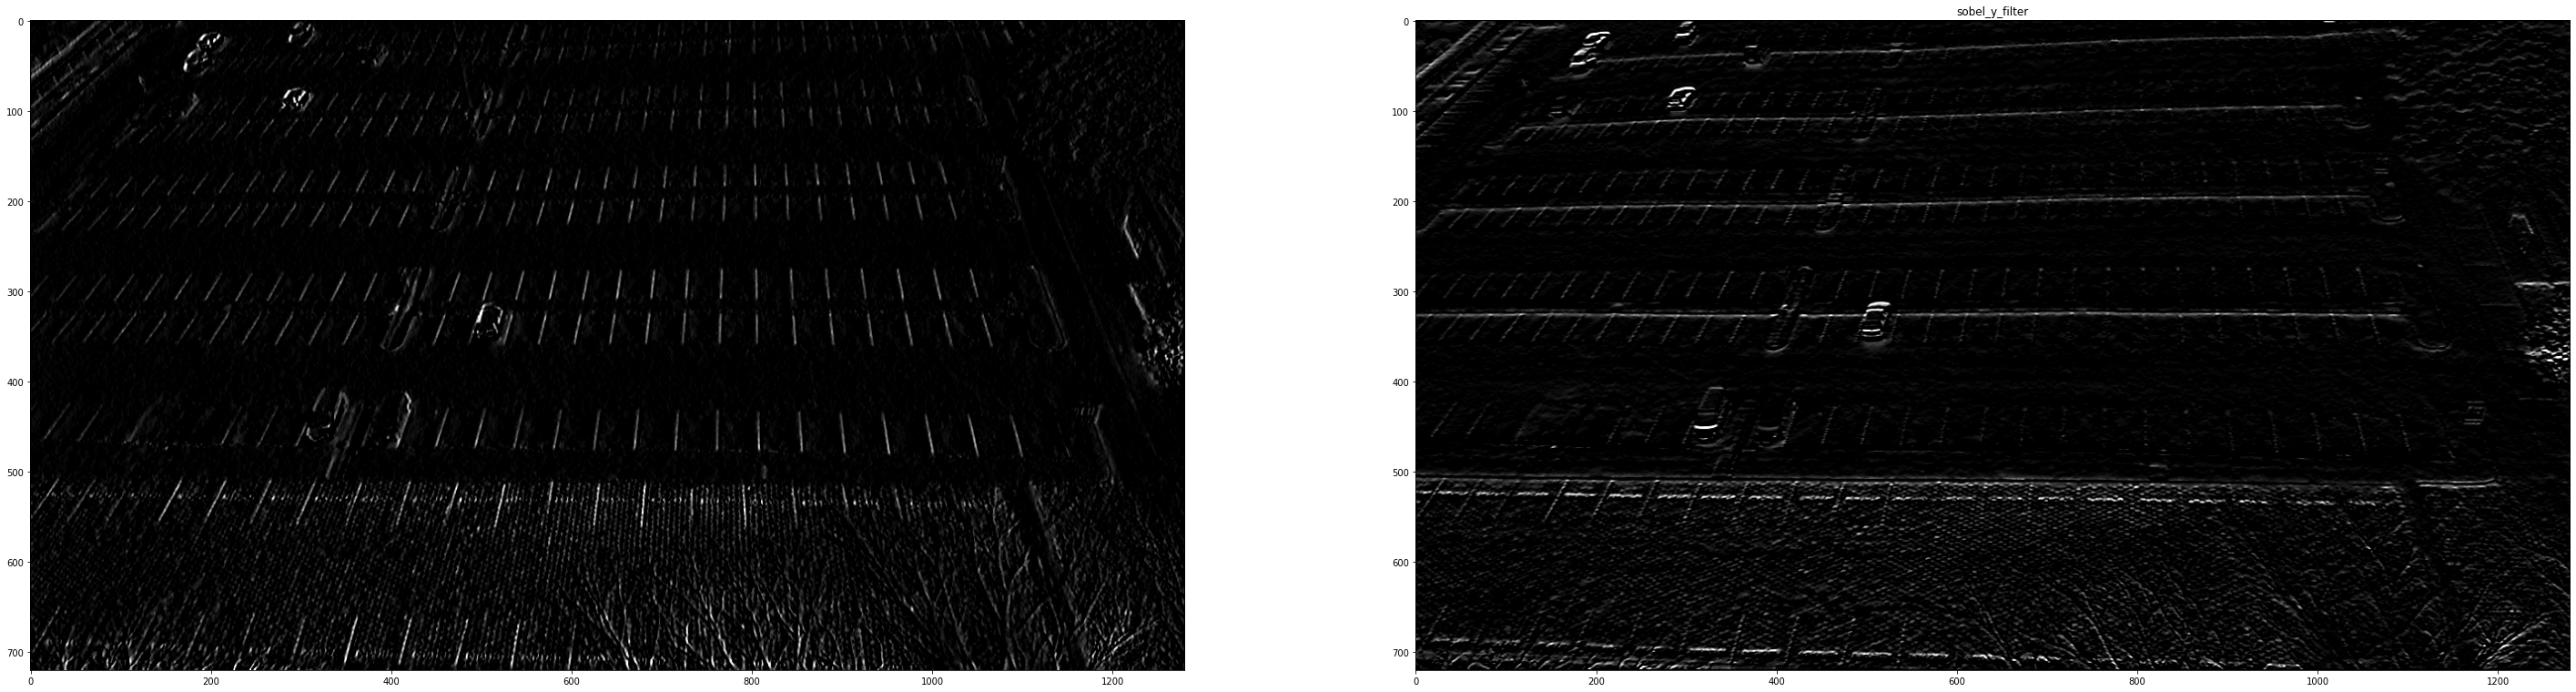

In [ ]:
# read citra
image = cv.imread('/content/drive/MyDrive/Semester 6/Pengolahan Citra Dan Visi Komputer/Car Park/2012-09-16_07_57_59.jpg', cv.IMREAD_COLOR)

# convert warna citra
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# konvolusi gambar dalam arah horizontal dan vertical menggunakan filter 3x3
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

filtered_image_y = cv.filter2D(image_gray, -1, sobel_y)
filtered_image_x = cv.filter2D(image_gray, -1, sobel_x)

f, axarr = plt.subplots(1,2, figsize=(50, 25)) 
axarr[0].imshow(filtered_image_x, cmap='gray'), axarr[1].set_title("sobel_x_filter")
axarr[1].imshow(filtered_image_y, cmap='gray'), axarr[1].set_title("sobel_y_filter")
plt.show()

Metode sobel sendiri akan cenderung mengurangi noise terlebih dahulu sebelum melakukan perhitungan deteksi tepi. Hanya saja kekurangannya, proses Sobel membuat beberapa tepi sebenarnya hilang dan memunculkan tepi yang bukan tepi sebenarnya dan cenderung menghasilkan tepi yang lebih tebal.

## **Laplacian**

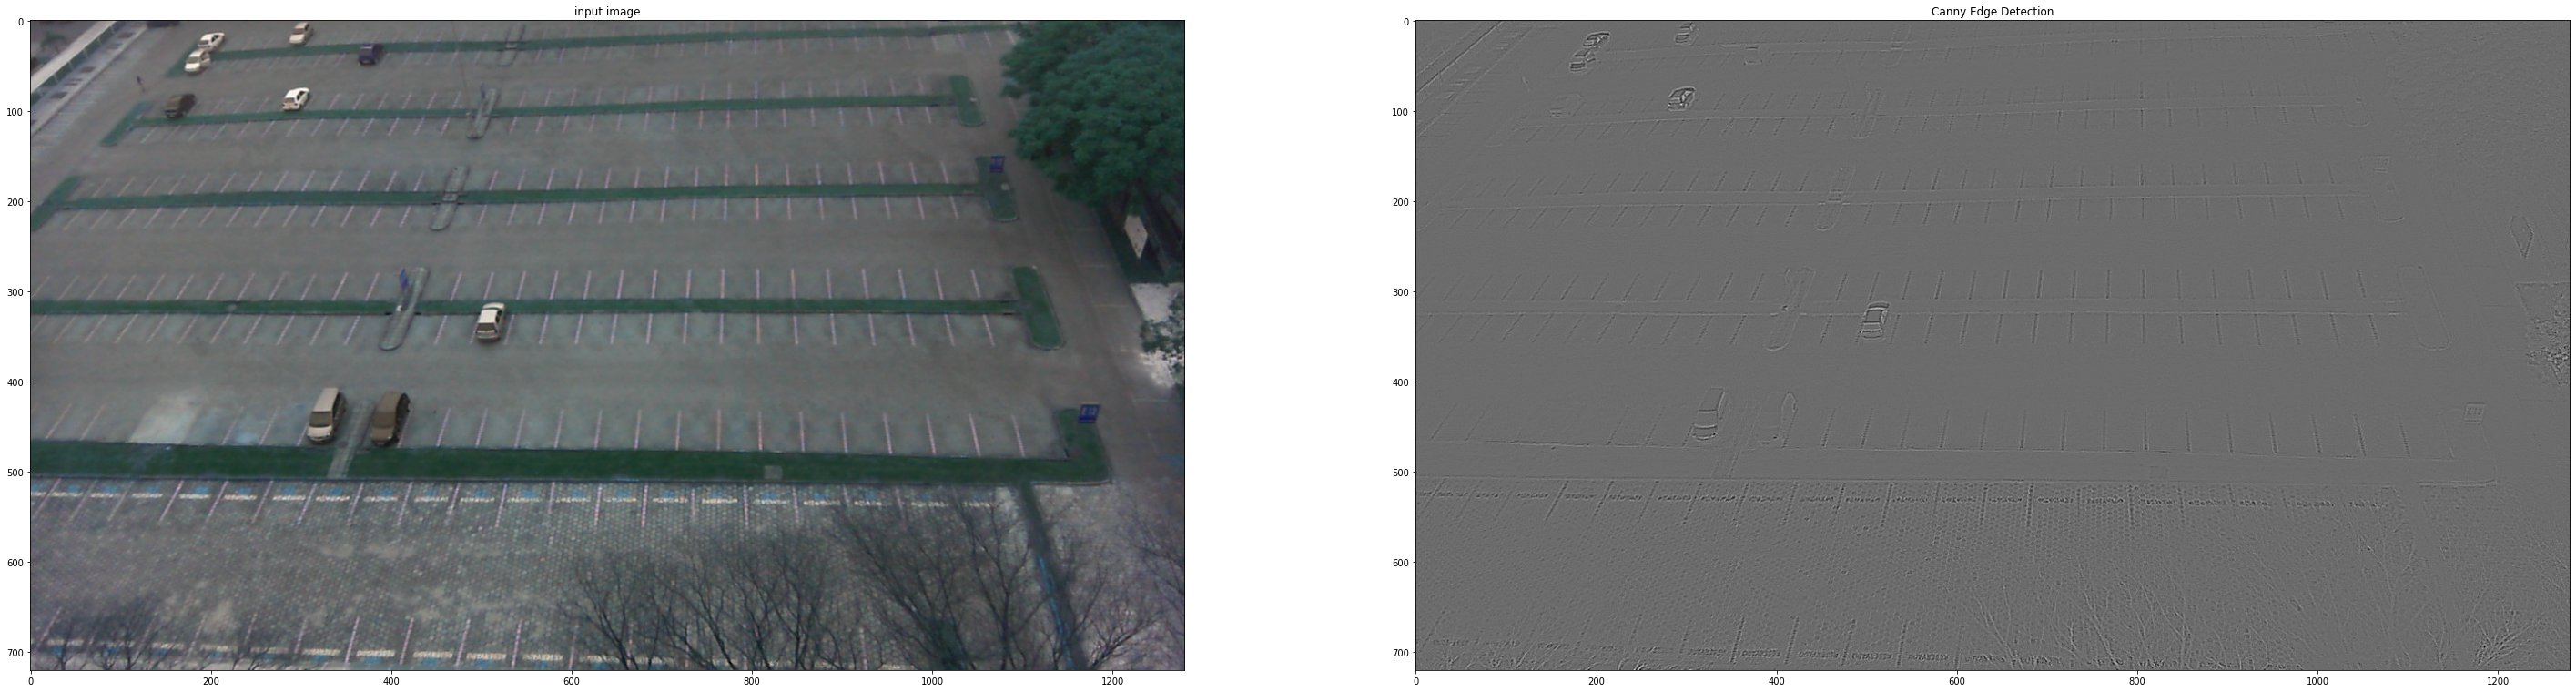

In [ ]:
# read citra
img = cv.imread('/content/drive/MyDrive/Semester 6/Pengolahan Citra Dan Visi Komputer/Car Park/2012-09-16_07_57_59.jpg', cv.IMREAD_COLOR)

# convert warna citra
image_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# memanggil fungsi Canny Edges dengan argument (citra, nilai_min, nilai_max)
laplacian = cv.Laplacian(image_gray,cv.CV_64F)

f, axarr = plt.subplots(1,2, figsize=(50, 25)) 
axarr[0].imshow(img, cmap = 'gray'), axarr[0].set_title("input image")
axarr[1].imshow(laplacian, cmap = 'gray'), axarr[1].set_title("Canny Edge Detection")


plt.show()

Meskipun metode ini cukup sensitif dengan noise, namun hasil deteksi laplacian dalam case ini lebih jelas dan akurat dibandingan sobel.

## **Canny**

(<matplotlib.image.AxesImage at 0x7f6d5e843390>,
 Text(0.5, 1.0, 'Canny Edge Detection'))

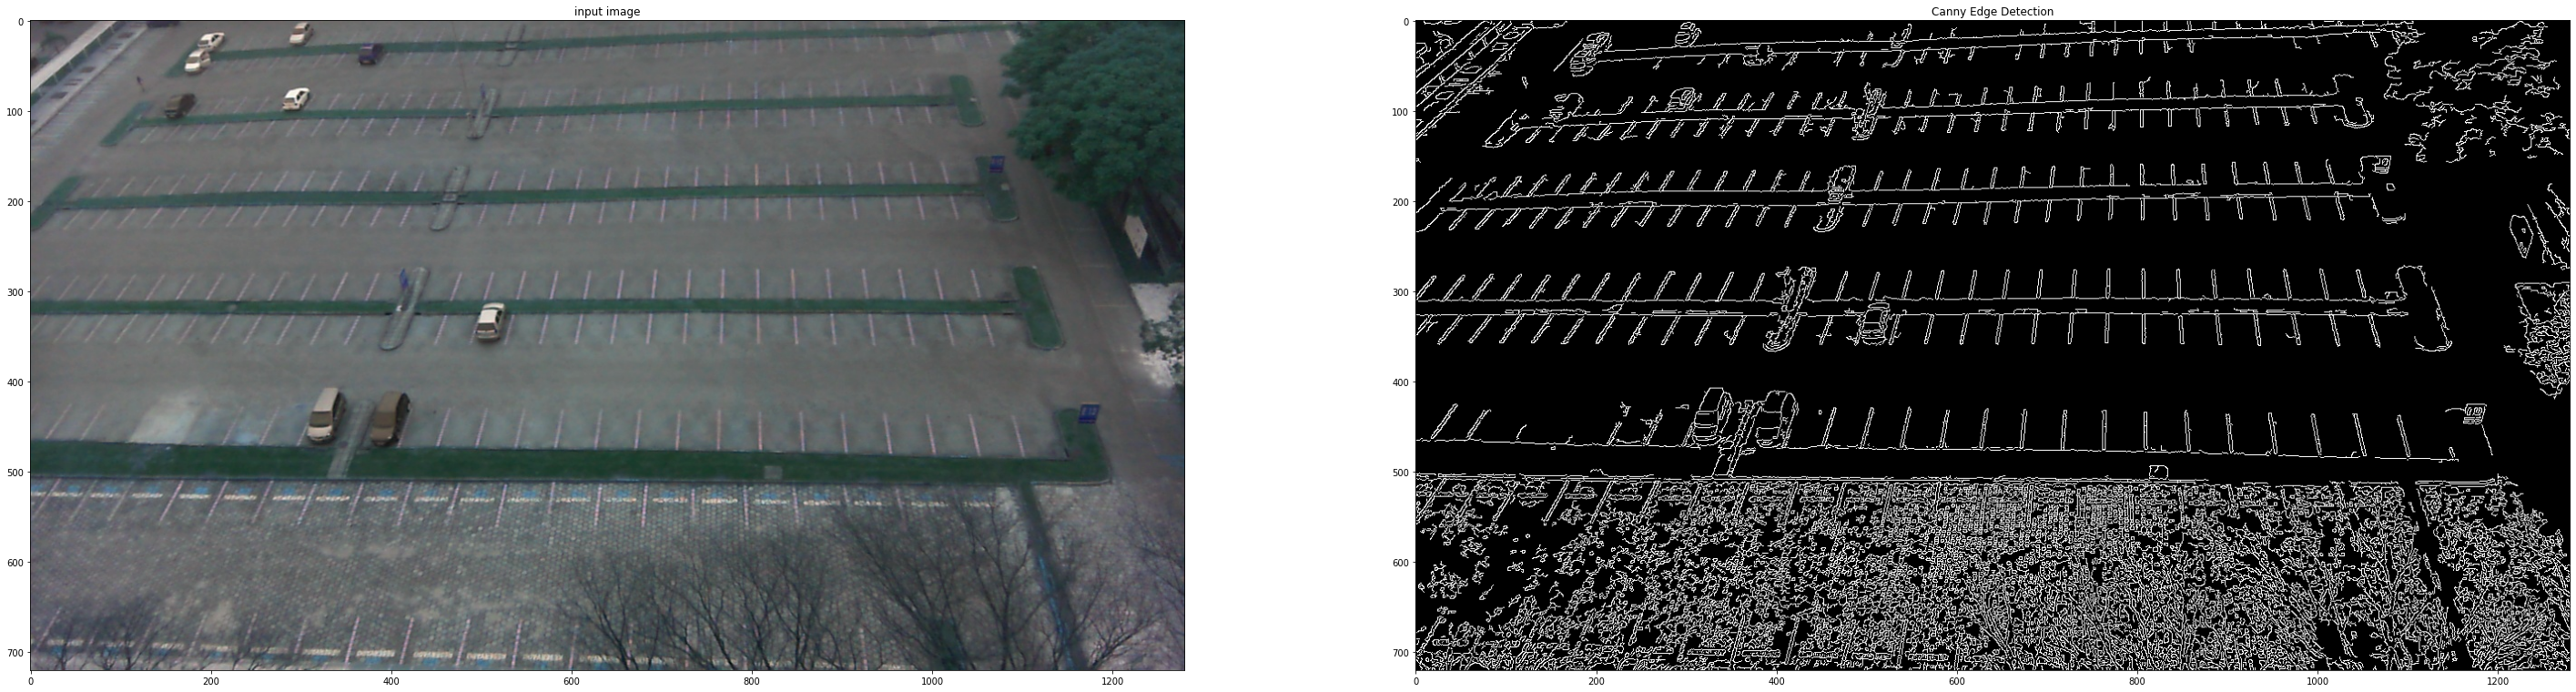

In [ ]:
# read citra
image = cv.imread('/content/drive/MyDrive/Semester 6/Pengolahan Citra Dan Visi Komputer/Car Park/2012-09-16_07_57_59.jpg', cv.IMREAD_COLOR)

# convert warna citra
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

filtered_image = cv.Canny(image_gray, threshold1=20, threshold2=80)

f, axarr = plt.subplots(1,2, figsize=(50, 25)) 
axarr[0].imshow(image), axarr[0].set_title("input image")
axarr[1].imshow(filtered_image, cmap='gray'), axarr[1].set_title("Canny Edge Detection")

Terlihat hasil deteksi tepi citra oleh cannya terlihat jauh lebih optimal jika dibandingkan dengan 2 metode sebelumnya. Oleh sebab itu, pada pengolahan citra selanjutnya, kami menitikberatkan metode canny dalam pengolahannya.

## Haarcascade

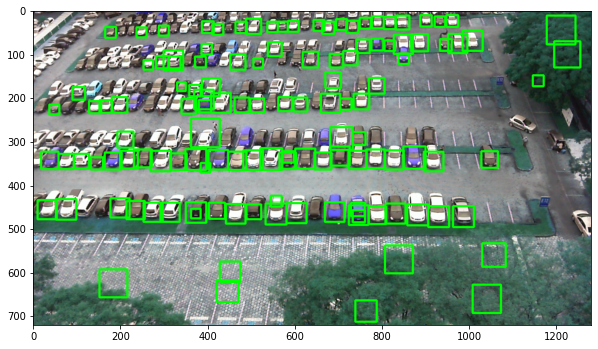

In [ ]:
cascade_car = cv.CascadeClassifier('/content/drive/MyDrive/Semester 6/Pengolahan Citra Dan Visi Komputer/cas1.xml')

img = cv.imread('/content/drive/MyDrive/Semester 6/Pengolahan Citra Dan Visi Komputer/Car Park/2012-11-10_08_47_45.jpg', 1)

cars = cascade_car.detectMultiScale(img)

for (x,y,w,h) in cars:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

plt.figure(figsize = (10, 10))
plt.imshow(img, cmap='gray')

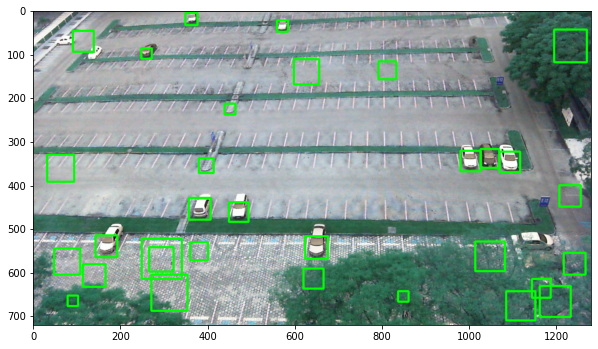

In [ ]:
cascade_car = cv.CascadeClassifier('/content/drive/MyDrive/Semester 6/Pengolahan Citra Dan Visi Komputer/cas1.xml')

img = cv.imread('/content/drive/MyDrive/Semester 6/Pengolahan Citra Dan Visi Komputer/Car Park/2012-10-26_06_49_25.jpg', 1)

cars = cascade_car.detectMultiScale(img)

for (x,y,w,h) in cars:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

plt.figure(figsize = (10, 10))
plt.imshow(img, cmap='gray')

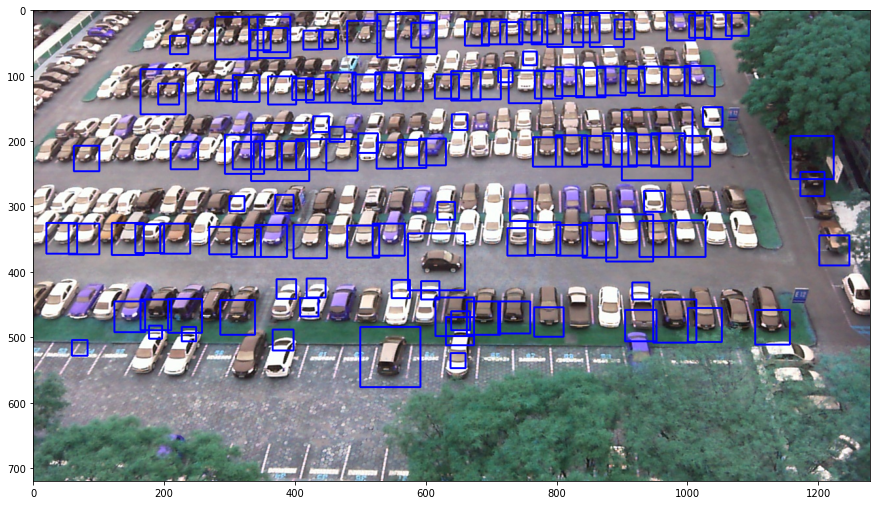

In [4]:
car_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Semester 6/Pengolahan Citra Dan Visi Komputer/cars.xml')
img = cv.imread('/content/drive/MyDrive/Semester 6/Pengolahan Citra Dan Visi Komputer/Car Park/2012-11-09_08_31_37.jpg', 1)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Detect cars
cars = car_cascade.detectMultiScale(gray, 1.1, 1)

# Draw border
for (x, y, w, h) in cars:
    cv.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)

# Show image
plt.figure(figsize=(15,20))
plt.imshow(img)